In [44]:
#Imports
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

# Initial dataset import

Entire group metric is to find the best neighborhood to cycle in. Using a streetsigns dataset, I'll be looking at each neighborhood from the perspective of safety.

In [45]:
#Upload and display data
signs = pd.read_csv("StreetSigns.csv")

signs.head(10)

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,283941710,WF,1010,Middle St,Pittsburgh,Metal Pole,1995-02-08,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,1858577624,WF,1107,Sherman Ave,Pittsburgh,Metal Pole,1995-03-22,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,1338013353,WF,1010,Middle St,Pittsburgh,Wood Pole,1996-05-09,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,208075892,WF,500,E North Ave,Pittsburgh,Wood Pole,1994-09-21,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,565974481,R1-1,1434,N St Clair St,Pittsburgh,Wood Pole,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


# Sign Counts

Find the individual counts of each neighborhood for how many total signs are recorded. Also display in a bar chart for a more visual representation.

South Side Flats             3672
Bloomfield                   3627
Central Business District    3491
Shadyside                    3370
Squirrel Hill South          3281
                             ... 
Ridgemont                      62
Chartiers City                 44
Glen Hazel                     38
Arlington Heights              21
Mount Oliver Borough           17
Name: neighborhood, Length: 91, dtype: int64


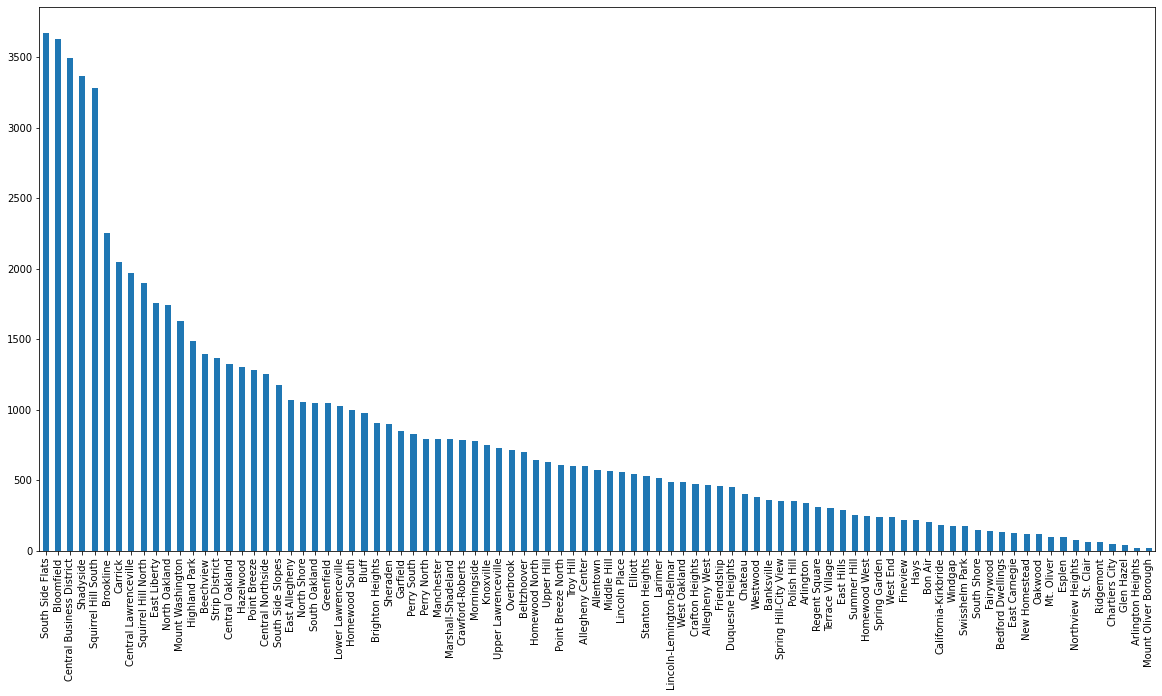

In [46]:
# Total count of all signs in each unique neighborhood
print(signs['neighborhood'].value_counts())
# Plots data in a bar graph
signs['neighborhood'].value_counts().plot.bar(figsize=(20, 10))


# Analysis and Reform

After looking at the data above, it led me to look deeper into the data set to see what kind of signs were actually being recorded. Came to the conclusion that a majority of the signs recorded have no impact on the safety for riding a bike. The best sign out of all within the dataset to represent my metric would be a focus on stop signs. Below the stop signs are sorted out, put into a new dataframe, and displayed in a bar chart.

In [78]:
#Sort out all of the rows that do not represent a stop sign

stop_mask = signs['description'] == "Stop"
stopsigns = signs[stop_mask]

signsdata = dict()

for i in stopsigns.index:
    if stopsigns.neighborhood[i] not in signsdata:
        signsdata[stopsigns.neighborhood[i]] = 1
    else:
        signsdata[stopsigns.neighborhood[i]] = signsdata[stopsigns.neighborhood[i]] + 1
        

data_items = signsdata.items()
data_list = list(data_items)

# Puts the new dataframe into a desecnding order to see the neighborhoods with the highest # of stop signs
stoptable = pd.DataFrame(data_list)
stoptable.columns = ['Neighborhood', 'Stop Signs']
stoptable = stoptable.sort_values('Stop Signs', ascending=False).reset_index(drop=True)


stoptable

,Neighborhood,Stop Signs
0,Brookline,349
1,Carrick,312
2,South Side Flats,292
3,Squirrel Hill South,257
4,Shadyside,228
...,...,...
87,Allegheny Center,8
88,St. Clair,6
89,South Shore,5
90,Arlington Heights,4


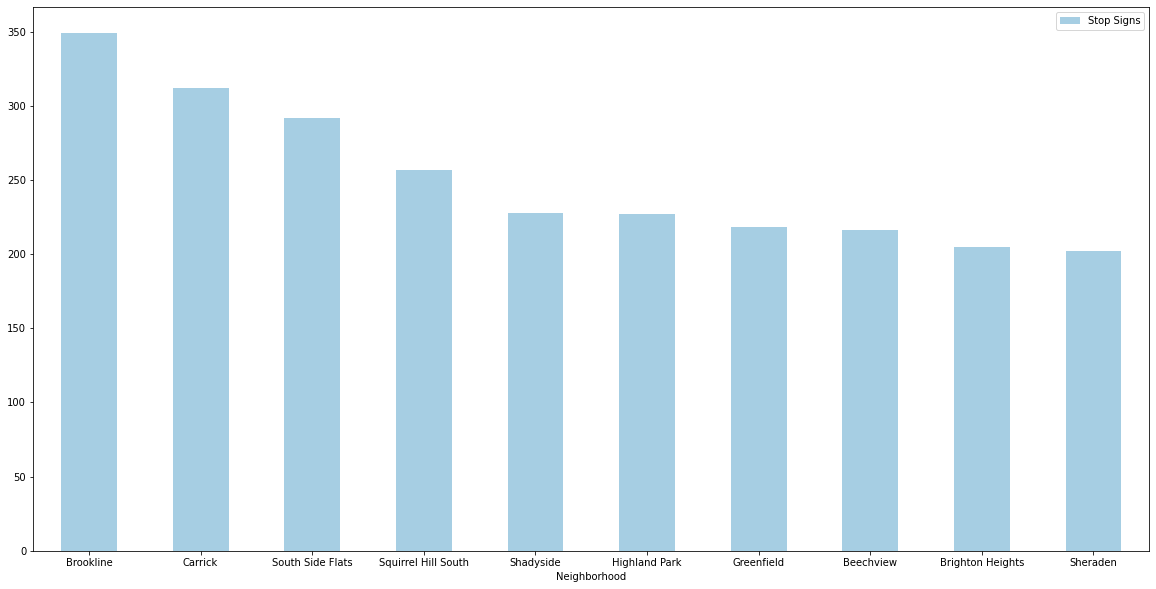

In [77]:
# Create ascending bar plot of the new stop signs dataset only showing the top 10
stoptable.sort_values('Stop Signs', ascending=False)[:10].plot.bar(x='Neighborhood', 
                                                                   figsize=(20, 10), 
                                                                   rot=0, 
                                                                   colormap='Paired')

# Map Visualization

Display the new dataframe from above that only has stop signs into a more visual heat map with the darker shades of red being the higher counts of stop signs.

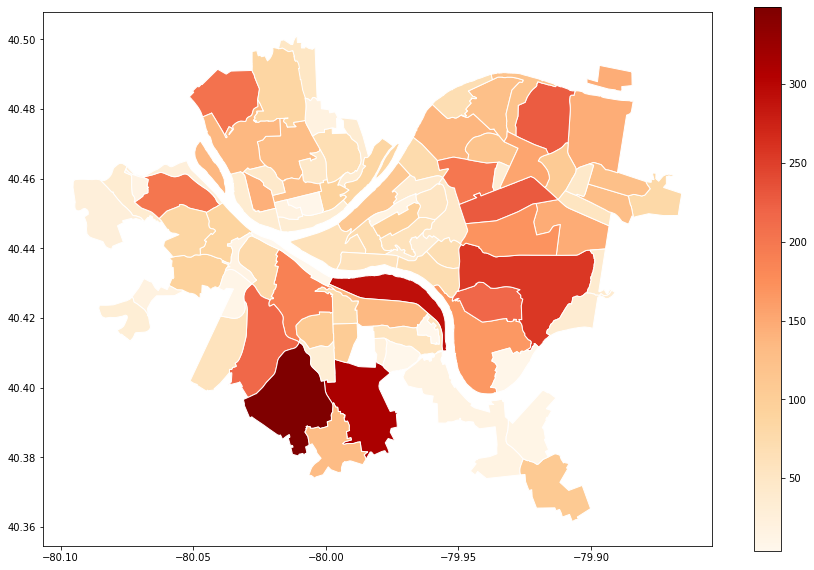

In [79]:
# Read Shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# merges shape file and data frame
map2 = neighborhoods.merge(stoptable, how='left', left_on='hood', right_on='Neighborhood')

# Creates a geoplot of the dataset on the neighborhoods of Pittsburgh
map2.plot(column='Stop Signs',
          edgecolor="white",
           legend=True,
          figsize=(15, 10),
          cmap='OrRd')

# Conclusion

After looking through the dataset with the perspective of safety when riding a bike in these areas. It was decided that the area with the highest quantity of stop signs would be deemed the "safest". More regulations on automobile traffic will lead to a more predictable enviorment in turn lessening the chance of a cycilist to getting ran over. Purely based off this metric, the top 10 neighborhoods for biking are:
1. Brookline
2. Carrick
3. South Side Flats
4. Squirrel Hill South
5. Shadyside
6. Highland Park
7. Greenfield
8. Beechview
9. Brighton Heights
10. Sheraden 